# Near-Antarctic class: profile distribution

## Load modules

In [1]:
# modules in this package
import load_and_preprocess as lp
import plot_tools as pt
import file_io as io
import density
import xarray
# plotting tools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import xarray as xr
import numpy as np
# os tools
import os.path

# warnings setup
import warnings
warnings.filterwarnings('ignore')

## Set some parameters

In [2]:
# set locations and names
descrip = 'WeddellOnly' # extra description for filename
data_location = '../../so-chic-data/' # input data location
classified_data_location = 'models/profiles_-65to80lon_-85to-30lat_20to1000depth_5K_allDomain_revised.nc'
ploc = 'plots/plots_WeddellClassOnly_top1000m_K04_forOSM22_forPaper/'
dloc = 'models/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)

# single class from previous effort to sub-classify
# don't forget 0 indexing
myClass=1

#longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
# depth range
zmin = 20.0
zmax = 1000.0

# ranges
lon_range = (lon_min, lon_max)
lat_range = (lat_min, lat_max)
depth_range = (zmin, zmax)

# temperature and salinity ranges for plotting
Trange=(-2.2, 6.0)
Srange=(33.5, 35.0)
sig0range = (26.6, 28.0)

# font size for plotting
fs = 18

## Data loading and plotting

In [3]:
# load single class (just the Weddell One)
profiles_antarctic = lp.load_single_class(classified_data_location, selected_class=myClass)


# take a look at the dataset
profiles_antarctic

load_and_preprocess.load_single_class
----> single-class profiles loaded


<xarray.Dataset>
Dimensions:        (profile: 28397, depth: 21, depth_highz: 50, sig0_levs: 100)
Coordinates:
  * profile        (profile) int64 13 14 15 16 ... 142282 142301 142320 142330
    lon            (profile) float64 ...
    lat            (profile) float64 ...
  * depth          (depth) float64 20.0 40.0 60.0 80.0 ... 820.0 910.0 1e+03
    time           (profile) datetime64[ns] ...
    year           (profile) int64 ...
    month          (profile) int64 ...
  * depth_highz    (depth_highz) float64 20.0 40.0 60.0 ... 960.0 980.0 1e+03
  * sig0_levs      (sig0_levs) float64 22.66 22.72 22.77 ... 27.86 27.91 27.97
Data variables: (12/13)
    prof_date      (profile) float64 ...
    prof_YYYYMMDD  (profile) float64 ...
    prof_HHMMSS    (profile) float64 ...
    prof_T         (profile, depth) float64 ...
    prof_S         (profile, depth) float64 ...
    sig0           (profile, depth) float64 ...
    ...             ...
    prof_CT        (profile, depth) float64 ...
    ct_on_highz    (profile, depth_highz) float64 ...
    sa_on_highz    (profile, depth_highz) float64 ...
    sig0_on_highz  (profile, depth_highz) float64 ...
    ct_on_sig0     (profile, sig0_levs) float64 ...
    sa_on_sig0     (profile, sig0_levs) float64 ...

## Plot histogram of profile locations 

plot_tools.plot_histogram_of_profile_locations
file_io.load_bathymetry


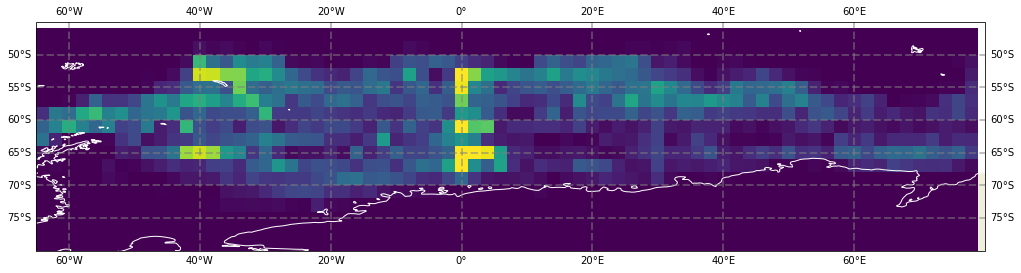

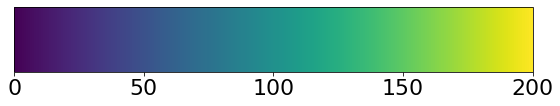

In [4]:
# histogram of profile locations
pt.plot_histogram_of_profile_locations(ploc, profiles_antarctic, lon_range, lat_range, source='all', binsize=2)

### Profile distribution by year 

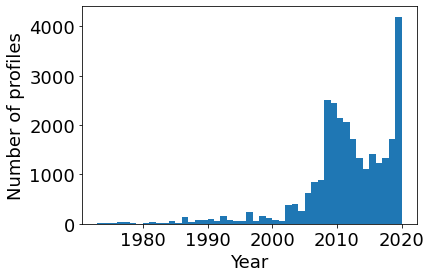

In [5]:
# histogram of distribution by year
xr.plot.hist(profiles_antarctic.year, bins=np.arange(profiles_antarctic.year.min(), profiles_antarctic.year.max()+1))
plt.xlabel('Year', fontsize=fs)
plt.ylabel('Number of profiles', fontsize=fs)
plt.tick_params(axis='x', labelsize=fs)
plt.tick_params(axis='y', labelsize=fs)
plt.savefig(ploc+'WeddellOnly_hist_byYear.png',bbox_inches='tight')
plt.savefig(ploc+'WeddellOnly_hist_byYear.pdf',bbox_inches='tight')
plt.show()
plt.close()

### Profile distribution by month

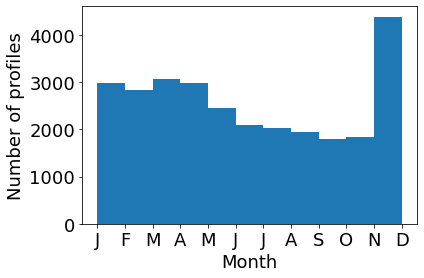

In [11]:
# histogram of distribution by month
xr.plot.hist(profiles_antarctic.month, bins=np.arange(1,13))
plt.xlabel('Month', fontsize=fs)
plt.ylabel('Number of profiles', fontsize=fs)
ms = ['J','F','M','A','M','J','J','A','S','O','N','D'];
plt.xticks(np.arange(1, 13, step=1), ms)
plt.tick_params(axis='x', labelsize=fs)
plt.tick_params(axis='y', labelsize=fs)
plt.savefig(ploc+'WeddellOnly_hist_byMonth.png',bbox_inches='tight')
plt.savefig(ploc+'WeddellOnly_hist_byMonth.pdf',bbox_inches='tight')
plt.show()
plt.close()

## Temperature, salinity, and density structure

plot_tools.plot_many_profiles


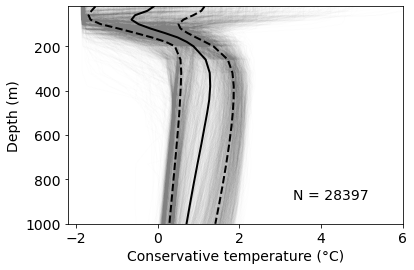

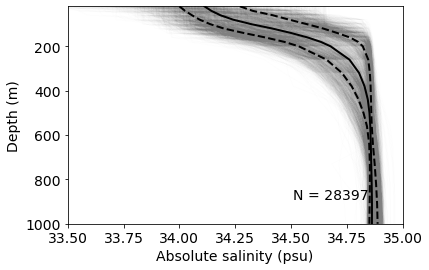

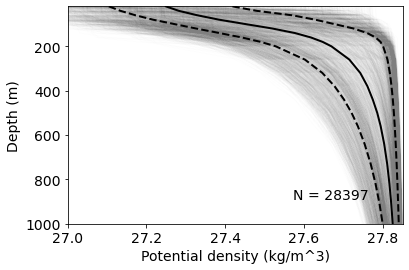

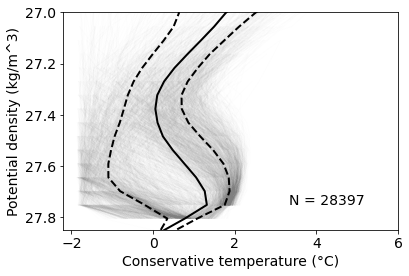

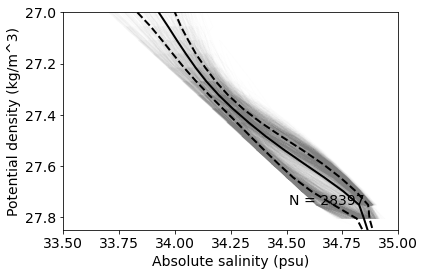

In [12]:
# make the "all profiles" plot
pt.plot_many_profiles(ploc, profiles_antarctic, frac = 0.10,
                      zmin = zmin, zmax = zmax,
                      Tmin = Trange[0], Tmax = Trange[1],
                      Smin = Srange[0], Smax = Srange[1],
                      sig0min = 27.0, sig0max = 27.85,
                      alpha = 0.01, modStr = '',
                      colorVal = 'black')